In [ ]:
! pip install sentence_transformers

Google Colab: https://colab.research.google.com/drive/1s0FQMcVkB3fKdwdvmaDbvovB5S_KHul8?usp=sharing 

HuggingFace: https://huggingface.co/sentence-transformers/all-mpnet-base-v2

# NLP Environment Setup for Semantic Analysis

This code sets up a comprehensive environment for natural language processing with a focus on semantic analysis:

### Core Components

1. **System and Environment Tools**
   - `os`: Operating system interfaces for file operations
   - `json`: JSON data handling for structured data exchange
   - `datetime`: Date and time manipulation
   - `dotenv`: Environment variable management from .env files

2. **Hugging Face Integration**
   - `HfApi`: Interface to interact with the Hugging Face model hub
   - `hf_hub_download`: Direct download functionality for models and datasets
   - `pipeline`: High-level API for using pre-trained models

3. **Data Visualization**
   - `numpy`: Numerical computing foundation
   - `matplotlib.pyplot`: Core plotting capabilities
   - `seaborn`: Enhanced statistical data visualization

4. **Semantic Text Analysis**
   - `SentenceTransformer`: Specialized library for generating text embeddings
     - Creates vector representations that capture semantic meaning
     - Enables similarity comparisons, clustering, and semantic search

This setup provides all the necessary tools for tasks like:
- Downloading and using pre-trained NLP models
- Computing semantic similarity between texts
- Visualizing relationships between text embeddings
- Creating embeddings for search or recommendation systems

The combination of Hugging Face's model ecosystem with SentenceTransformer's specialized embedding capabilities offers a powerful foundation for advanced text analysis applications.

In [1]:
import os, json, datetime
from datetime import datetime
from dotenv import load_dotenv

from huggingface_hub import HfApi
from huggingface_hub import hf_hub_download

from transformers import pipeline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer


/Users/raamraam/genaicourse/Week2/temp_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



# Loading Environment Variables for Hugging Face


This code snippet performs two essential operations:

1. `load_dotenv()` - Loads environment variables from a `.env` file into the application's environment. This is a common pattern for securely storing configuration and sensitive information outside of the source code.

2. `hf_key = os.getenv("HF_TOKEN")` - Retrieves the Hugging Face API token from the environment variables and assigns it to the variable `hf_key`. This token is required for authenticated access to the Hugging Face Hub services, including downloading private models or models with gated access.


In [2]:
load_dotenv()
hf_key=os.getenv("HF_TOKEN")

# Setting Up Sentence Transformer for Text Embeddings

# Hugging Face Model Reference

[sentence-transformers/all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2)

## Model Details

This code initializes a state-of-the-art sentence embedding model from the Sentence Transformers library:

### Model Selection
- **Model ID**: `all-mpnet-base-v2`
- **Architecture**: MPNet (Masked and Permuted Pre-training for Language Understanding)
- **Performance**: One of the best-performing general-purpose embedding models
- **Vector Size**: 768 dimensions

### Key Capabilities
- Creates dense vector representations that capture semantic meaning
- Consistently ranks among top models on semantic textual similarity benchmarks
- Performs well on a wide range of tasks without task-specific fine-tuning
- Balances quality and efficiency better than larger models

### Technical Specifications
- Built on Microsoft's MPNet architecture
- Fine-tuned on over 1 billion training pairs
- Optimized for semantic similarity tasks
- Works with sentences, paragraphs, and short documents

This model is particularly effective for:
- Semantic search
- Clustering similar texts
- Finding document similarities
- Text classification
- Information retrieval

The model will be downloaded on first use and cached locally for future access, making subsequent operations much faster.

In [3]:
hf_reference='sentence-transformers/all-mpnet-base-v2'
hf_model_cache=SentenceTransformer(hf_reference)

# Dataset for Semantic Text Analysis

## Dataset Structure

This code creates a curated dataset for demonstrating semantic similarity and clustering:

### Content Organization
- **10 sentences** grouped into 3 distinct topic categories
- Balanced representation with varying numbers of examples per category

### Topic Distribution
1. **Technology (4 sentences)**
   - Covers AI, smartphones, cloud computing, and IoT
   - Connected by themes of digital technology and innovation

2. **Nature (3 sentences)**
   - Includes geological features, ecosystems, and climate
   - Connected by themes of natural environments and systems

3. **Food (3 sentences)**
   - Represents cuisine, flavoring, and dietary choices
   - Connected by themes of culinary concepts and eating

### Labels Array
- Parallel array with categorical labels matching each sentence
- Provides ground truth for evaluating clustering and classification tasks
- Enables color-coding in visualizations

This structured dataset is ideal for demonstrating how embedding models like MPNet can automatically discover semantic relationships between texts, even when they contain no overlapping keywords.

In [4]:
# Create 10 sentences across 3 subjects
sentences = [
    # Technology (4 sentences)
    "Artificial intelligence is reshaping our future.",
    "Smartphones have revolutionized modern communication.",
    "Cloud computing enables remote data storage and access.",
    "The internet of things connects everyday devices online.",
    
    # Nature (3 sentences)
    "Mountains are formed by tectonic plate movements.",
    "Rainforests provide habitat for countless species.",
    "Oceans regulate the global climate system.",
    
    # Food (3 sentences)
    "Italian cuisine is famous for pasta and pizza.",
    "Spices enhance the flavor of many dishes.",
    "Vegetarian diets exclude meat and fish."
]

# Create labels for each sentence to identify the subject
labels = ["Tech", "Tech", "Tech", "Tech", "Nature", "Nature", "Nature", "Food", "Food", "Food"]

In [19]:
import requests

API_URL = "https://router.huggingface.co/hf-inference/pipeline/sentence-similarity/sentence-transformers/all-mpnet-base-v2"
headers = {
    "Authorization": f"Bearer {hf_key}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": {
    "source_sentence": "Italian cuisine is famous for pasta and pizza",
    "sentences": [
        "Spices enhance the flavor of many dishes",
        "Mountains are formed by tectonic plate movements",
        "Smartphones have revolutionized modern communication"
    ]
},
})

output

[0.3150954246520996, 0.1784791350364685, 0.07918179035186768]

# Understanding Sentence Embeddings

## Output Analysis

This code generates and displays the vector embedding for the first sentence in our dataset:

### Process:
- `hf_model_cache.encode()`: Passes the sentence through the MPNet model
- `sentences[0]`: "Artificial intelligence is reshaping our future."
- `convert_to_numpy=True`: Returns the embedding as a NumPy array

### Embedding Dimensions:
- `embeddings.shape`: Will show `(768,)`
- This is a one-dimensional vector with 768 elements
- Each element (or feature) captures different semantic aspects of the text

### Vector Content:
- The output displays the actual numeric values in the embedding
- Values typically range between -1 and 1
- These numbers represent the sentence in a high-dimensional semantic space
- Similar sentences will have similar patterns of values

### Significance:
This dense vector representation captures the semantic meaning of the sentence in a way that computers can process mathematically. The 768 dimensions collectively encode information about:

- Topic (technology, AI)
- Sentiment (neutral/positive discussion of future impact)
- Context (technological development and societal change)

The embedding enables algorithms to measure similarity between texts, even when they use different words to express related concepts.

In [5]:
embeddings=hf_model_cache.encode(sentences[0], convert_to_numpy=True)
print(embeddings.shape)
print(embeddings)

(768,)
[-9.70286876e-03  9.43308696e-02 -4.70830798e-02 -4.82598692e-02
 -2.42847037e-02 -1.88485403e-02  3.72412056e-02  4.13534697e-03
  1.15979733e-02  7.99019448e-03  7.10062087e-02  6.62546977e-02
 -5.40992245e-02  8.69380310e-02  1.33138616e-02 -4.56334315e-02
  1.72226708e-02 -1.27958320e-02 -2.12600324e-02  2.00569779e-02
 -7.53562674e-02  2.07016040e-02 -1.95255894e-02  4.87889871e-02
 -5.54119013e-02  1.91300493e-02  2.24424992e-02  1.01596732e-02
  4.80245128e-02 -2.08319388e-02 -5.21298591e-03 -1.53527576e-02
  2.08320878e-02  3.34909968e-02  1.91139543e-06 -3.71696167e-02
  5.70124621e-03  1.77641120e-02 -7.44305924e-02 -1.36708701e-02
 -5.37427003e-03  2.31269859e-02 -2.81909481e-02  1.56781059e-02
 -6.84099123e-02  9.70821753e-02  4.85435035e-03 -1.07951835e-02
 -2.33567469e-02  2.65746806e-02  1.21845189e-03 -1.17205195e-02
  2.29133628e-02  1.69116985e-02 -1.92242321e-02 -1.09284464e-02
  1.66656580e-02 -2.10790411e-02 -1.78087186e-02 -4.27760370e-02
 -4.82065836e-03  

# Processing Multiple Sentences with Sentence Transformer

## Output Analysis

This code generates vector embeddings for all sentences in our dataset simultaneously:

### Process:
- `hf_model_cache.encode()`: Processes multiple sentences in a batch
- `sentences`: The full list of 10 sentences across three topics
- `convert_to_numpy=True`: Returns results as a NumPy array

### Embedding Dimensions:
- `embeddings.shape`: Will show `(10, 768)`
- This is a two-dimensional array (matrix):
  - First dimension (10): Number of sentences
  - Second dimension (768): Embedding size for each sentence

### Efficiency Benefits:
- **Batch Processing**: Much faster than encoding sentences one by one
- **Vectorization**: Leverages GPU acceleration when available
- **Memory Efficiency**: Processes all sentences in a single operation

### Technical Details:
- Each row in the matrix contains the 768-dimensional embedding for one sentence
- All sentences are represented in the same semantic space
- The matrix structure enables easy computation of similarity metrics:
  - Cosine similarity
  - Euclidean distance
  - Dot products

This matrix of embeddings provides the foundation for analyzing semantic relationships between all sentences in our dataset, enabling clustering, visualization, and similarity detection.

In [7]:
embeddings = hf_model_cache.encode(sentences, convert_to_numpy=True)
print(embeddings.shape)

(10, 768)


# Visualizing Semantic Embeddings with a Heatmap

## Process Explanation

This code creates a visual representation of the sentence embeddings as a heatmap:

### Data Preparation
- **Dimension Reduction**: `dimensions=100` selects only the first 100 dimensions (out of 768)
  - Makes visualization more manageable
  - Focuses on the dimensions with higher variance
  - Reduces computational load

- **Value Normalization**: Scales all values to the range [0,1]
  - `min_val` and `max_val`: Find the global minimum and maximum
  - Formula: `(value - min) / (max - min)`
  - Creates consistent color mapping across all values

### Visualization Configuration
- **Figure Size**: 16×10 inches provides ample space for the detailed matrix
- **Color Scheme**: "coolwarm" uses blue for negative values and red for positive
- **Center Point**: Sets white as the neutral/zero point

### Semantic Context
- **Y-axis Labels**: Combines category labels with sentence text
  - Format: "Tech: Artificial intelligence is reshaping our future."
  - Enables quick identification of patterns by category

- **X-axis Labels**: Identifies each dimension
  - Format: "dim_0", "dim_1", etc.
  - Provides reference for specific embedding components

### Visual Patterns
In the resulting heatmap:
- Sentences from the same category (Tech, Nature, Food) will show similar color patterns
- Distinct color profiles emerge for different semantic categories
- The visual similarities directly reflect semantic relationships
- Some dimensions will appear more active (darker colors) for specific topics

This visualization helps identify which embedding dimensions capture particular semantic concepts and how sentences cluster based on their meaning.

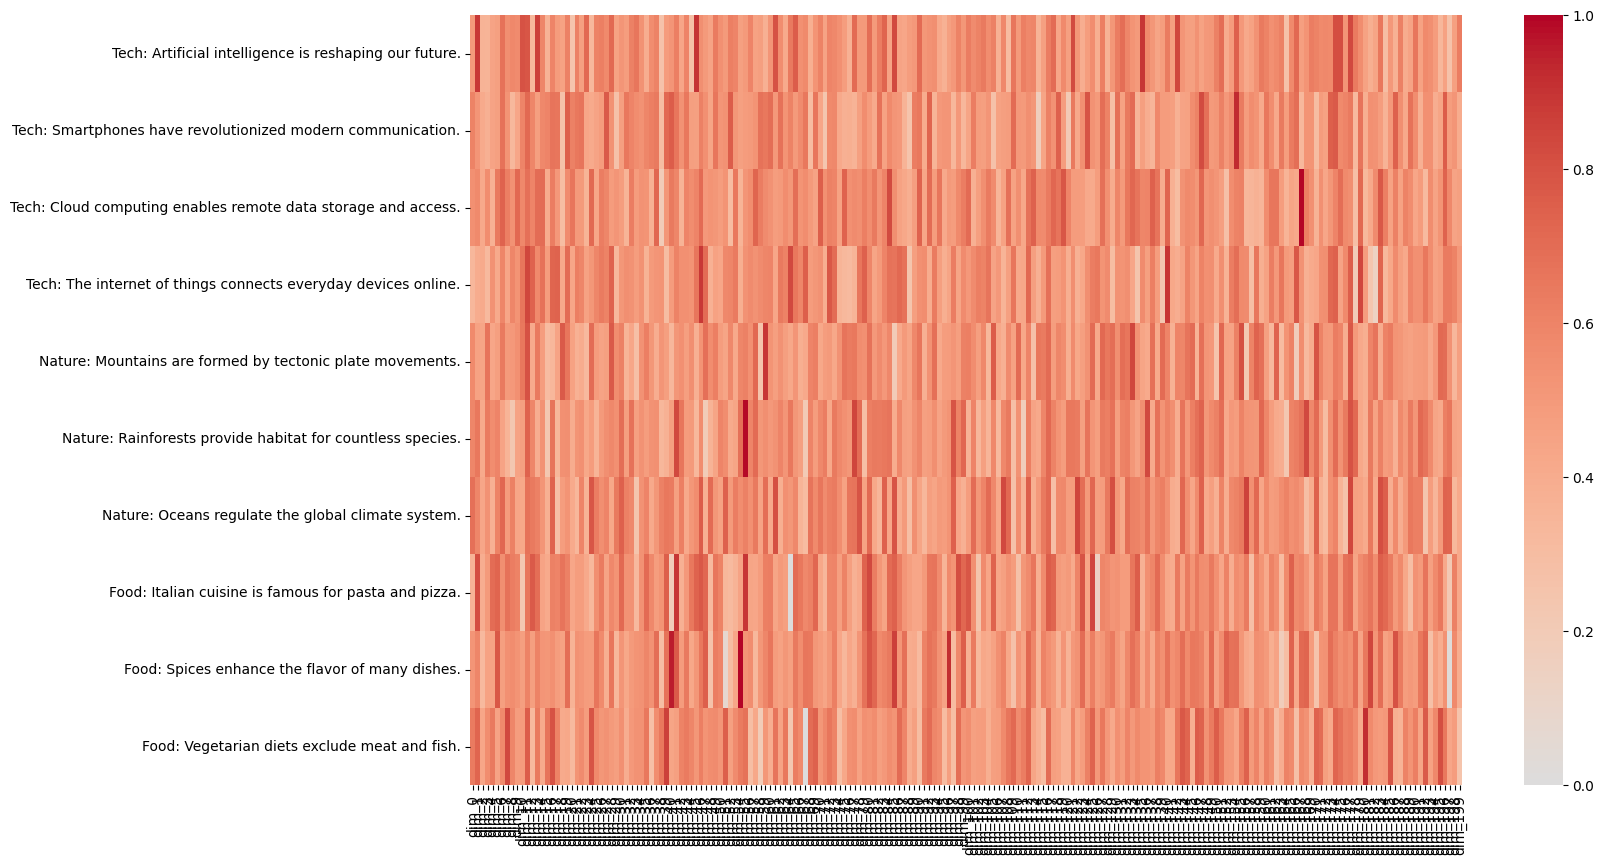

In [15]:
dimensions=200
embedding_subset = embeddings[:, :dimensions]
min_val = np.min(embedding_subset)
max_val = np.max(embedding_subset)
normalized_embeddings = (embedding_subset - min_val) / (max_val - min_val)

# heatmap_embeddings = embedding_subset
heatmap_embeddings = normalized_embeddings

plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    normalized_embeddings, 
    cmap="coolwarm",
    center=0,
    yticklabels=[f"{label}: {sent}" for label, sent in zip(labels, sentences)],
    xticklabels=[f"dim_{i}" for i in range(len(normalized_embeddings[0]))]  # Label each dimension
)